In [1]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

2021-12-03 01:02:35.674003: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-03 01:02:35.674022: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
BREED_FILE = "breeds.txt"
MODEL_FILE = "best_local_refined.h5"
IMG_SIZE = 224

In [4]:
labels = []
with open(BREED_FILE, "r") as f:
    for line in f:
        labels.append(line.strip())

## Cargar modelo entrenado previamente
El modelo está basado en la arquitectura [EfficientNetB0](https://arxiv.org/abs/1905.11946) con la última capa reconstruida para adecuarse al número de categorías para esta tarea específica. En este caso, se cuentan con 120 razas de perros definidas en el archivo `breeds.txt`.

El modelo ha sido entrenado previamente usando la técnica de transfer learning y fine tuning de los parámetros entrenados sobre imagenet.

In [10]:
loaded_model = tf.keras.models.load_model(MODEL_FILE)
loaded_model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 img_augmentation (Sequential)  (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['img_augmentation[0][0]']       
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]'] 

## Realizar una predicción

In [8]:
image_file = "chihuahua.jpeg"
n_top = 3

img = np.array(Image.open(image_file).resize((IMG_SIZE,IMG_SIZE)), dtype=np.float32)
pred = loaded_model.predict(img.reshape(-1, IMG_SIZE, IMG_SIZE, 3))


## Desplegar resultados

{'chihuahua': 0.979911744594574, 'french_bulldog': 0.012445087544620037, 'mexican_hairless': 0.003943475894629955}


([<matplotlib.axis.XTick at 0x7f0ca0e98df0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

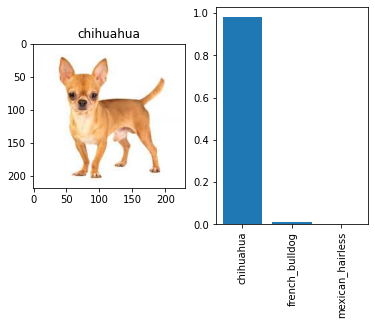

In [9]:
top_labels = {}
if len(labels) >= n_top:
    top_labels_ids = np.flip(np.argsort(pred, axis=1)[0, -n_top:])
    for label_id in top_labels_ids:
        top_labels[labels[label_id]] = pred[0,label_id].item()
pred_label = labels[np.argmax(pred)]
print(top_labels)
plt.subplot(1,2,1)
plt.imshow(Image.open(image_file))
plt.title(pred_label)
plt.subplot(1,2,2)
plt.bar(top_labels.keys(), top_labels.values())
plt.xticks(list(top_labels.keys()), rotation='vertical')